# The growth of choppies stores

The growth of Choppies supermarket from 1999 to 2021

In [91]:
#Choppies.csv
choppies <- read.csv("choppies.csv")

In [92]:
str(choppies)

'data.frame':	108 obs. of  8 variables:
 $ Name     : chr  "Choppies Bobonong" "Choppies Letlhakane" "Choppies Mahalapye" "Choppies Mahalapye" ...
 $ District : chr  "Central" "Central" "Central" "Central" ...
 $ Town     : chr  "Bobonong" "Letlhakane" "Mahalapye" "Mahalapye" ...
 $ Address  : chr  "Moilamba Ward,Cash Bazaar building" "Nkosho Ward,Letlhakane" "Plot 6042, Main Mall, Mahalapye" "Watershed Mall, A1,  Mahalapye" ...
 $ latitude : num  -22 -21.4 -23.1 -23.1 NA ...
 $ longitude: num  28.4 25.6 26.8 26.8 NA ...
 $ Date     : chr  "12/09/2012" "12/10/2007" "13/01/2012" "" ...
 $ Registred: chr  "Y" "Y" "Y" "Y" ...


In [93]:
choppies$Name <- as.character(choppies$Name )
choppies$Address <- as.character(choppies$Address)
choppies$Date <- as.Date(choppies$Date, "%d/%m/%Y")

Converting variables to lowercase makes them easy to work with...

In [94]:
names(choppies) <- tolower(names(choppies))

In [95]:
str(choppies)

'data.frame':	108 obs. of  8 variables:
 $ name     : chr  "Choppies Bobonong" "Choppies Letlhakane" "Choppies Mahalapye" "Choppies Mahalapye" ...
 $ district : chr  "Central" "Central" "Central" "Central" ...
 $ town     : chr  "Bobonong" "Letlhakane" "Mahalapye" "Mahalapye" ...
 $ address  : chr  "Moilamba Ward,Cash Bazaar building" "Nkosho Ward,Letlhakane" "Plot 6042, Main Mall, Mahalapye" "Watershed Mall, A1,  Mahalapye" ...
 $ latitude : num  -22 -21.4 -23.1 -23.1 NA ...
 $ longitude: num  28.4 25.6 26.8 26.8 NA ...
 $ date     : Date, format: "2012-09-12" "2007-10-12" ...
 $ registred: chr  "Y" "Y" "Y" "Y" ...


In [96]:
summary(choppies)

     name             district             town             address         
 Length:108         Length:108         Length:108         Length:108        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    latitude        longitude          date             registred        
 Min.   :-26.02   Min.   :21.64   Min.   :1999-11-02   Length:108        
 1st Qu.:-24.66   1st Qu.:25.55   1st Qu.:2006-03-16   Class :character  
 Median :-24.61   Median :25.87   Median :2012-06-22   Mode  :character  
 Mean   :-23.48   Mean   :25.81   Mean   :2011-09-14                     
 3rd Qu.:-21.9

In [116]:
library(dplyr)

In [97]:
choppies %>% group_by(district) %>% summarise(n = n()) %>% arrange(desc(n))

district,n
<chr>,<int>
South-East,42
Kweneng,18
Central,17
Southern,9
North-East,7
North-West,4
Chobe,2
Ghanzi,2
Kgalagadi,2


In [98]:
choppies %>% group_by(town) %>% 
summarise(n = n()) %>% 
arrange(desc(n)) %>%
top_n(10) 

Selecting by n


town,n
<chr>,<int>
Gaborone,28
Mogoditshane,9
Francistown,7
Lobatse,7
Mahalapye,3
Maun,3
Molepolole,3
Palapye,3
Ramotswa,3


In [99]:
choppies$month <- months(choppies$date)
choppies$year <- as.numeric(format(choppies$date, "%Y"))

In [100]:
str(choppies)

'data.frame':	108 obs. of  10 variables:
 $ name     : chr  "Choppies Bobonong" "Choppies Letlhakane" "Choppies Mahalapye" "Choppies Mahalapye" ...
 $ district : chr  "Central" "Central" "Central" "Central" ...
 $ town     : chr  "Bobonong" "Letlhakane" "Mahalapye" "Mahalapye" ...
 $ address  : chr  "Moilamba Ward,Cash Bazaar building" "Nkosho Ward,Letlhakane" "Plot 6042, Main Mall, Mahalapye" "Watershed Mall, A1,  Mahalapye" ...
 $ latitude : num  -22 -21.4 -23.1 -23.1 NA ...
 $ longitude: num  28.4 25.6 26.8 26.8 NA ...
 $ date     : Date, format: "2012-09-12" "2007-10-12" ...
 $ registred: chr  "Y" "Y" "Y" "Y" ...
 $ month    : chr  "September" "October" "January" NA ...
 $ year     : num  2012 2007 2012 NA 2012 ...


In [101]:
choppies %>% na.omit %>%
group_by(year) %>%
summarise(n = n()) %>%
arrange(desc(n)) %>% head()

year,n
<dbl>,<int>
2005,10
2012,9
2010,8
2003,7
2013,7
2018,7


In [113]:
choppies %>% filter(!is.na(year)) %>%
group_by(year, district) %>%
summarise(n = n()) %>%
arrange(desc(n)) %>%
ungroup() %>%
top_n(10)


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Selecting by n


year,district,n
<dbl>,<chr>,<int>
2005,South-East,6
2010,South-East,6
2012,South-East,6
2018,South-East,6
2012,Central,5
2013,Kweneng,4
2003,Southern,3
2006,Kweneng,3
2013,South-East,3


In [103]:
c <- choppies %>% 
filter(!is.na(year)) %>%
select(district,year) 

df <- data.frame(c)
df$district <- factor(df$district)
str(df)


'data.frame':	98 obs. of  2 variables:
 $ district: Factor w/ 12 levels "Central","Chobe",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year    : num  2012 2007 2012 2012 2005 ...


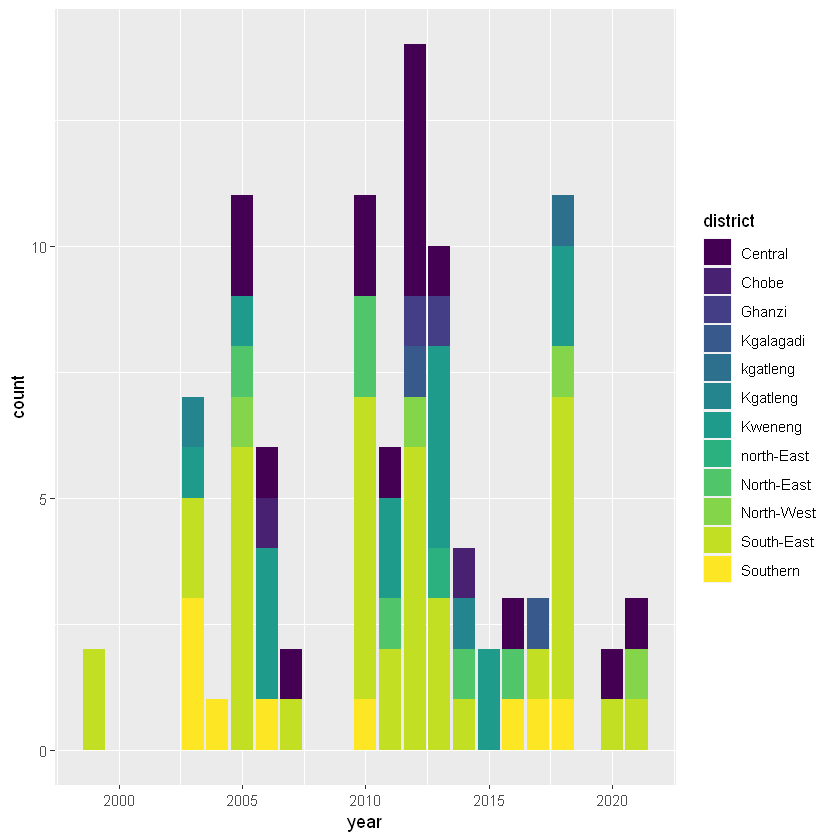

In [104]:
ggplot(df, aes(year, fill=district)) + 
geom_bar() +
scale_fill_viridis(discrete = TRUE)